# SINDy-SHRED Tutorial on Sea Surface Temperature

#### Import Libraries

In [1]:
# PYSHRED
from pyshred import DataManager, SHRED, SHREDEngine, SINDy_Forecaster

# Other helper libraries
import matplotlib.pyplot as plt
from scipy.io import loadmat
import torch
import numpy as np

#### Load in SST Data

In [2]:
sst_data = np.load("sst_data.npy")

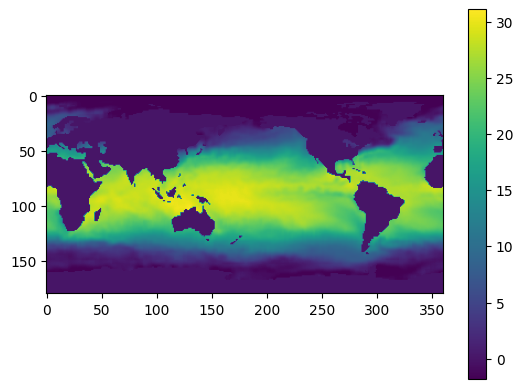

In [3]:
# Plotting a single frame
plt.figure()
plt.imshow(sst_data[0]) 
plt.colorbar()
plt.show()

#### Initialize Data Manager

In [4]:
manager = DataManager(
    lags = 52,
    train_size = 0.8,
    val_size = 0.1,
    test_size = 0.1,
)

#### Add datasets and sensors

In [5]:
manager.add_data(
    data = sst_data,
    id = "SST",
    random = 50,
    # mobile=,
    # stationary=,
    # measurements=,
    compress=False,
)

#### Analyze sensor summary

In [6]:
manager.sensor_summary_df

,data id,sensor_number,type,loc/traj
0,SST,0,stationary (random),"(40, 343)"
1,SST,1,stationary (random),"(136, 255)"
2,SST,2,stationary (random),"(66, 219)"
3,SST,3,stationary (random),"(75, 5)"
4,SST,4,stationary (random),"(2, 206)"
5,SST,5,stationary (random),"(43, 229)"
6,SST,6,stationary (random),"(121, 31)"
7,SST,7,stationary (random),"(46, 136)"
8,SST,8,stationary (random),"(43, 88)"
9,SST,9,stationary (random),"(147, 153)"


In [7]:
manager.sensor_measurements_df

,SST-0,SST-1,SST-2,SST-3,SST-4,SST-5,SST-6,SST-7,SST-8,SST-9,...,SST-40,SST-41,SST-42,SST-43,SST-44,SST-45,SST-46,SST-47,SST-48,SST-49
0,11.74,10.08,22.190000,0.0,-1.80,11.12,25.069999,2.78,0.0,3.28,...,0.15,-0.0,0.0,20.200000,29.159999,22.689999,15.22,21.740000,28.719999,24.539999
1,11.67,10.21,22.100000,0.0,-1.80,10.70,24.049999,2.12,0.0,3.61,...,0.06,-0.0,0.0,19.910000,28.129999,23.609999,14.96,22.589999,28.189999,24.279999
2,11.73,10.61,21.890000,0.0,-1.80,10.29,24.849999,1.53,0.0,3.63,...,0.31,-0.0,0.0,19.170000,28.789999,23.079999,15.90,21.410000,28.639999,24.899999
3,11.33,10.91,21.600000,0.0,-1.80,9.87,24.879999,1.68,0.0,3.72,...,0.53,-0.0,0.0,19.180000,28.539999,23.349999,17.87,22.350000,28.559999,24.389999
4,11.17,11.19,21.590000,0.0,-1.80,9.45,24.889999,1.35,0.0,3.76,...,0.52,-0.0,0.0,18.770000,28.059999,23.999999,17.69,22.100000,28.449999,24.219999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,15.89,8.09,24.459999,0.0,-1.70,17.31,21.770000,17.67,0.0,1.56,...,-1.75,-0.0,0.0,21.540000,27.819999,18.070000,11.61,16.390000,27.649999,27.269999
1396,15.61,8.22,24.159999,0.0,-1.78,16.82,20.870000,16.34,0.0,1.83,...,-1.70,-0.0,0.0,21.690000,28.039999,17.930000,11.92,16.970000,27.649999,26.809999
1397,15.17,8.34,24.369999,0.0,-1.80,16.12,20.980000,14.77,0.0,1.41,...,-1.65,-0.0,0.0,21.740000,28.209999,17.940000,12.23,17.360000,27.799999,26.839999
1398,14.79,8.75,24.199999,0.0,-1.80,15.60,21.330000,13.03,0.0,1.87,...,-1.47,-0.0,0.0,21.840000,28.019999,18.140000,12.83,17.410000,27.619999,26.679999


#### Get train, validation, and test set

In [8]:
train_dataset, val_dataset, test_dataset= manager.prepare()

#### Initialize a latent forecaster

In [9]:
latent_forecaster = SINDy_Forecaster(poly_order=1, include_sine=True, dt=1/5)

#### Initialize SHRED

In [10]:
shred = SHRED(sequence_model="GRU", decoder_model="MLP", latent_forecaster=latent_forecaster)

#### Fit SHRED

In [11]:
val_errors = shred.fit(train_dataset=train_dataset, val_dataset=val_dataset, num_epochs=10, sindy_thres_epoch=20, sindy_regularization=1)
print('val_errors:', val_errors)

Fitting SindySHRED...
Epoch 1: Average training loss = 0.091680
Validation MSE (epoch 1): 0.032684
Epoch 2: Average training loss = 0.032257
Validation MSE (epoch 2): 0.015280
Epoch 3: Average training loss = 0.020602
Validation MSE (epoch 3): 0.013595
Epoch 4: Average training loss = 0.018892
Validation MSE (epoch 4): 0.013358
Epoch 5: Average training loss = 0.017929
Validation MSE (epoch 5): 0.013441
Epoch 6: Average training loss = 0.017431
Validation MSE (epoch 6): 0.013291
Epoch 7: Average training loss = 0.017039
Validation MSE (epoch 7): 0.014045
Epoch 8: Average training loss = 0.016548
Validation MSE (epoch 8): 0.013414
Epoch 9: Average training loss = 0.015898
Validation MSE (epoch 9): 0.013693
Epoch 10: Average training loss = 0.015332
Validation MSE (epoch 10): 0.013768
val_errors: [0.03268439 0.01527982 0.01359512 0.01335787 0.01344112 0.01329135
 0.01404459 0.01341446 0.0136935  0.01376815]


#### Evaluate SHRED

In [12]:
train_mse = shred.evaluate(dataset=train_dataset)
val_mse = shred.evaluate(dataset=val_dataset)
test_mse = shred.evaluate(dataset=test_dataset)
print(f"Train MSE: {train_mse:.3f}")
print(f"Val   MSE: {val_mse:.3f}")
print(f"Test  MSE: {test_mse:.3f}")

Train MSE: 0.010
Val   MSE: 0.014
Test  MSE: 0.018


#### SINDy Discovered Latent Dynamics

In [13]:
print(shred.latent_forecaster)

(x0)' = 0.269 1 + 0.326 x0 + -0.079 x1 + 0.486 x2
(x1)' = 0.449 1 + 0.333 x0 + -0.308 x1 + 0.189 x2
(x2)' = -0.492 1 + -0.529 x0 + 0.191 x1 + -0.292 x2


#### Initialize SHRED Engine for Downstream Tasks

In [14]:
engine = SHREDEngine(manager, shred)

#### Sensor Measurements to Latent Space

In [15]:
test_latent_from_sensors = engine.sensor_to_latent(manager.test_sensor_measurements)

#### Forecast Latent Space (No Sensor Measurements)

In [16]:
val_latents = engine.sensor_to_latent(manager.val_sensor_measurements)
init_latents = val_latents[-1] # seed forecaster with final latent space from val
h = len(manager.test_sensor_measurements)
test_latent_from_forecaster = engine.forecast_latent(h=h, init_latents=init_latents)

#### Decode Latent Space to Full-State Space

In [17]:
test_prediction = engine.decode(test_latent_from_sensors) # latent space generated from sensor data
test_forecast = engine.decode(test_latent_from_forecaster) # latent space generated from latent forecasted (no sensor data)

Compare final frame in prediction and forecast to ground truth:

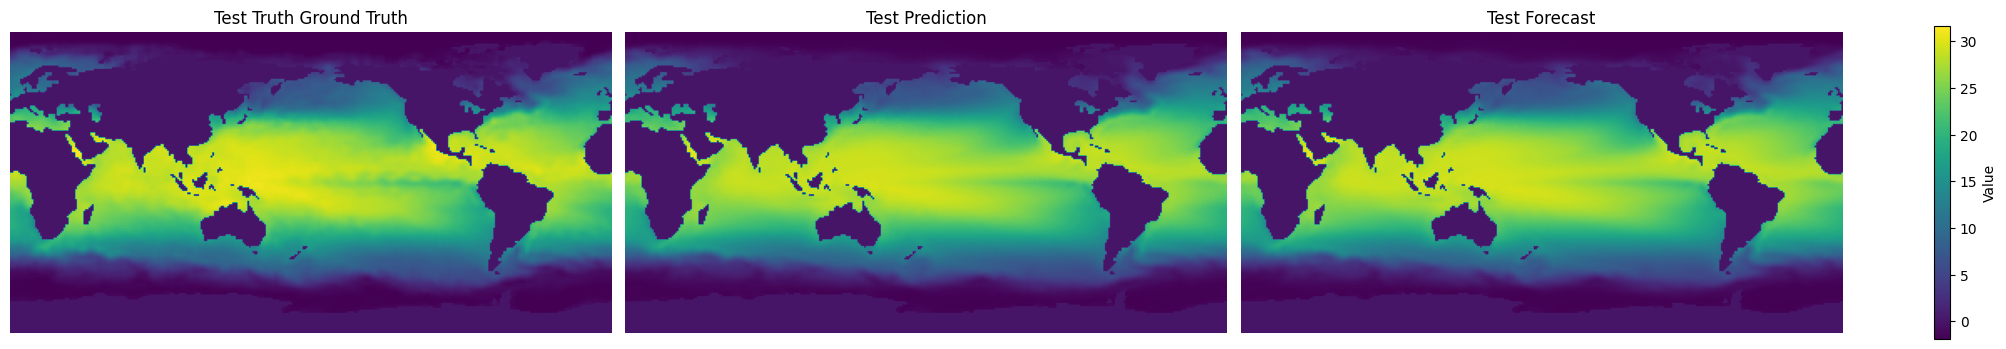

In [18]:
truth      = sst_data[-1]
prediction = test_prediction['SST'][-1]
forecast   = test_forecast['SST'][-1]

data   = [truth, prediction, forecast]
titles = ["Test Truth Ground Truth", "Test Prediction", "Test Forecast"]

vmin, vmax = np.min([d.min() for d in data]), np.max([d.max() for d in data])

fig, axes = plt.subplots(1, 3, figsize=(20, 4), constrained_layout=True)

for ax, d, title in zip(axes, data, titles):
    im = ax.imshow(d, vmin=vmin, vmax=vmax)
    ax.set(title=title)
    ax.axis("off")

fig.colorbar(im, ax=axes, label="Value", shrink=0.8)

#### Evaluate MSE on Ground Truth Data

In [19]:
# Train
t_train = len(manager.train_sensor_measurements)
train_Y = {'SST': sst_data[0:t_train]}
train_error = engine.evaluate(manager.train_sensor_measurements, train_Y)

# Val
t_val = len(manager.test_sensor_measurements)
val_Y = {'SST': sst_data[t_train:t_train+t_val]}
val_error = engine.evaluate(manager.val_sensor_measurements, val_Y)

# Test
t_test = len(manager.test_sensor_measurements)
test_Y = {'SST': sst_data[-t_test:]}
test_error = engine.evaluate(manager.test_sensor_measurements, test_Y)

print('---------- TRAIN ----------')
print(train_error)
print('\n---------- VAL   ----------')
print(val_error)
print('\n---------- TEST  ----------')
print(test_error)

---------- TRAIN ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      0.580466  0.761883  0.425608  0.407465

---------- VAL   ----------
              MSE     RMSE       MAE        R2
dataset                                       
SST      0.936849  0.96791  0.498381 -0.579918

---------- TEST  ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      1.248095  1.117182  0.587646 -0.453009
